# Full revision analysis

## List of work to be performed:
1. Supplementary figure showing incorrect inform tumor segmentation and NKT cells 
2. Supplementary figure with zoom-in images of individual cells from inForm and TME-Analyzer in an image with high disagreement 
3. Incorporation of DeepCell into TME-Analyzer 
4. Reorganize the MonteCarlo trials 
5. Supplementary table 6 with full ranking of parameters and discovery/validation p values if top n parameters were used instead. 
6. Generate forest plot for 4E 
7. Build classifier based on train-test split of discovery cohort. Try 16-47, 32-31, 47-16 splits. 
8. ? It is significant amount of work, but since both reviewers mention is, I can train a random forest on the original dataset and report it ? 
9. Fig 2B, 2C, and Fig S1: The authors should provide a boxplot or violin plot with all the original data points. Detailed statistics (which statistic test was used) should be added to the corresponding figure legends. Fig 2B and Fig S1A are poorly designed and confusing with the statistics. The authors should provide detailed comparison plots instead of average stack bar plots.
We have replotted the data using box-whisker plots, per cell type, with the statistic test used now also mentioned in the figure legends; similar to 2C?


## 9. remake plots of 2B, 2C and Fig S1

start with recreating the plots in figure2

C:\Users\balci\AppData\Local\Temp\ipykernel_42120\3686686601.py:49: RuntimeWarning: Mean of empty slice
  mean_values = np.nanmean(distance_table.iloc[sample,:].to_numpy(),axis = 0)


Text(0, 0.5, 'Distance to CD8 (μm)')

<Figure size 640x480 with 0 Axes>

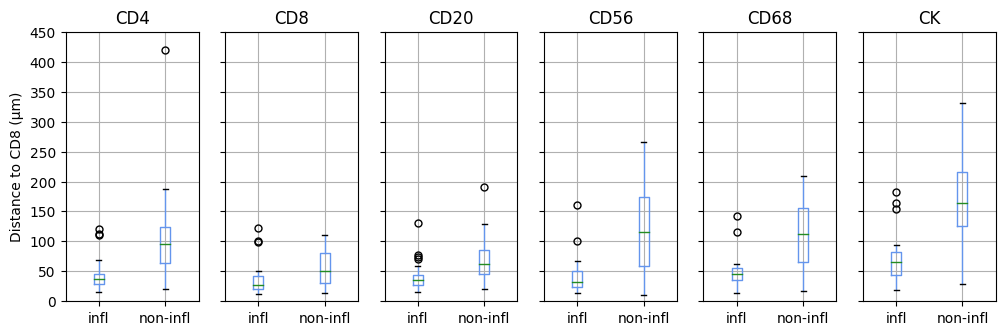

In [72]:
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt


px_size = 0.4999


combined_frame5 = pd.read_csv("E:/Moved from E/TME-Analyzer_the_manuscript/20211129_TME-Analyzer/data_analysis/reproduction_of_old_analysis/20230607_Marcel/combined_full.xls",sep='\t').set_index('sample id')

clinical_data = pd.read_csv('E:/Moved from E/Dora effector/COX_analysis/survival without HER2 samples_mod.txt',sep='\t').set_index('sample')
samples = [i for i in combined_frame5.index]
patients = list(np.unique([i[:11] for i in samples]))

for patient_index in patients:
    MSI_of_interest = []
    for MSI in samples:
        if patient_index in MSI:
            MSI_of_interest.append(MSI)
    to_average = combined_frame5.loc[MSI_of_interest]
    if (np.sum(to_average['location'] == 'border') <3) & (np.sum(to_average['location'] == 'center') <3):
        patients.pop(patients.index(patient_index))

patients = [i for i in patients if clinical_data.loc[i,'mfs'] == clinical_data.loc[i,'mfs']]

# print(len(patients),patients)

distance_table_header = ['sample id']
distance_table_header = []
phenos_of_interest1  = ['CD20','CD3','CD3 CD8','CD56','CD68','CK','other','All']
phenos_of_interest2  = ['CD3 CD8']
segments = ['All','Tumor+','Stroma+']
for pheno1 in phenos_of_interest1:
    for pheno2 in phenos_of_interest2:
        for tissue_temp in segments:
            distance_table_header.append('distance from ' + pheno1 + ' to ' + pheno2 + ' in ' + tissue_temp)
distance_table= combined_frame5[distance_table_header]


infl_table = []
infl_pts = []
non_infl_table = []
non_infl_pts = []
all_table = []
all_pts = []
for patient in patients:
    sample = [patient in i for i in samples]
    mean_values = np.nanmean(distance_table.iloc[sample,:].to_numpy(),axis = 0)
    if clinical_data.loc[patient,'score vectra'] == 'inflamed':
        infl_table.append(mean_values)
        infl_pts.append(patient)
        mean_values = mean_values.tolist()
        mean_values.append('infl')
    else:
        non_infl_table.append(mean_values)
        non_infl_pts.append(patient)
        mean_values = mean_values.tolist()
        mean_values.append('non-infl')
    all_table.append(mean_values)
    all_pts.append(patient)

pd_non_infl = pd.DataFrame(non_infl_table, index = non_infl_pts, columns = distance_table_header)
pd_infl = pd.DataFrame(infl_table, index = infl_pts, columns = distance_table_header)

all_table_header = distance_table_header
all_table_header.append('inflammation')
# pd_all = pd.DataFrame(all_table, index = all_pts, columns = all_table_header)
# pd_all.iloc[:,[0,3,6,9,12,15,24]].boxplot(by='inflammation')

all_table_header2 = []
for i in all_table_header:
    all_table_header2.append(i.replace('CD3 CD8','CD8').replace('CD3','CD4').replace(' in All',''))
plt.figure()
pd_all2 = pd.DataFrame(all_table, index = all_pts, columns = all_table_header2)
fig, axs = plt.subplots(nrows=1, ncols=6, figsize=(12, 3.5), sharey=True)
boxprops = dict(color='cornflowerblue')
whiskerprops = dict(color='cornflowerblue')
medianprops = dict(color='forestgreen')
flierprops = dict(markersize=5)
for n_i, i in enumerate([3,6,0,9,12,15]):
    fig_title = pd_all2.keys()[i]
    infl_data = pd_all2.loc[pd_all2['inflammation']=='infl',fig_title].to_numpy()
    infl_data = infl_data[~np.isnan(infl_data)]
    non_infl_data = pd_all2.loc[pd_all2['inflammation']=='non-infl',fig_title].to_numpy()
    non_infl_data = non_infl_data[~np.isnan(non_infl_data)]
    axs[n_i].boxplot([infl_data,non_infl_data], labels = ['infl','non-infl'],
                     boxprops=boxprops,medianprops=medianprops,flierprops=flierprops,whiskerprops=whiskerprops)
    axs[n_i].set_title(fig_title[14:-7])
fig = plt.gcf()
fig.suptitle('')
ax = fig.gca()
ax.set_ylim(0,450)
# print(pd_all2.loc[pd_all2['inflammation']=='infl',fig_title])
# print(pd_all2.loc[pd_all2['inflammation']=='non-infl',fig_title])
for ax in axs:
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.yaxis.grid(True)
    ax.xaxis.grid(True)

axs[0].set_ylabel('Distance to CD8 (\u03bcm)')


now remake the inform plot

C:\Users\balci\AppData\Local\Temp\ipykernel_42120\1858070966.py:23: RuntimeWarning: Mean of empty slice
  mean_values = np.nanmean(distance_table.iloc[sample,:].to_numpy(),axis = 0)


Text(0, 0.5, 'Distance to CD8 (μm)')

<Figure size 640x480 with 0 Axes>

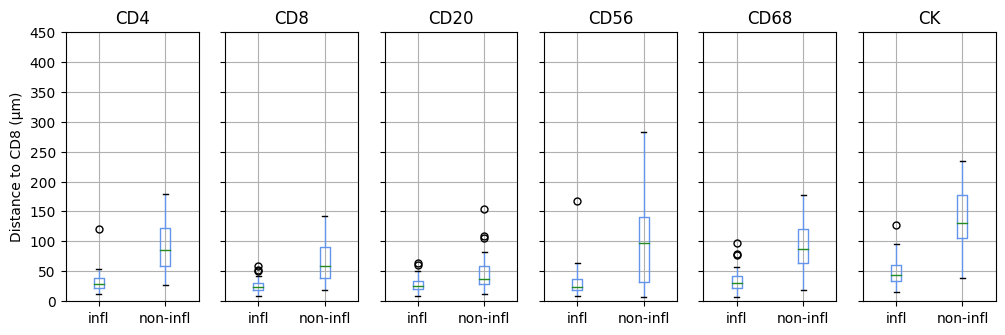

In [71]:

# print(len(patients),patients)

distance_table_header = ['sample id']
distance_table_header = []
phenos_of_interest1  = ['CD20','CD3','CD3 CD8','CD56','CD68','CK','other','All']
phenos_of_interest2  = ['CD3 CD8']
segments = ['All','Tumor','Stroma']
for pheno1 in phenos_of_interest1:
    for pheno2 in phenos_of_interest2:
        for tissue_temp in segments:
            distance_table_header.append('inform distance from ' + pheno1 + ' to ' + pheno2 + ' in ' + tissue_temp)
distance_table= combined_frame5[distance_table_header]


infl_table = []
infl_pts = []
non_infl_table = []
non_infl_pts = []
all_table = []
all_pts = []
for patient in patients:
    sample = [patient in i for i in samples]
    mean_values = np.nanmean(distance_table.iloc[sample,:].to_numpy(),axis = 0)
    if clinical_data.loc[patient,'score vectra'] == 'inflamed':
        infl_table.append(mean_values)
        infl_pts.append(patient)
        mean_values = mean_values.tolist()
        mean_values.append('infl')
    else:
        non_infl_table.append(mean_values)
        non_infl_pts.append(patient)
        mean_values = mean_values.tolist()
        mean_values.append('non-infl')
    all_table.append(mean_values)
    all_pts.append(patient)

pd_non_infl = pd.DataFrame(non_infl_table, index = non_infl_pts, columns = distance_table_header)
pd_infl = pd.DataFrame(infl_table, index = infl_pts, columns = distance_table_header)

all_table_header = distance_table_header
all_table_header.append('inflammation')
# pd_all = pd.DataFrame(all_table, index = all_pts, columns = all_table_header)
# pd_all.iloc[:,[0,3,6,9,12,15,24]].boxplot(by='inflammation')

all_table_header2 = []
for i in all_table_header:
    all_table_header2.append(i.replace('CD3 CD8','CD8').replace('CD3','CD4').replace(' in All',''))
plt.figure()
pd_all2 = pd.DataFrame(all_table, index = all_pts, columns = all_table_header2)
fig, axs = plt.subplots(nrows=1, ncols=6, figsize=(12, 3.5), sharey=True)
boxprops = dict(color='cornflowerblue')
whiskerprops = dict(color='cornflowerblue')
medianprops = dict(color='forestgreen')
flierprops = dict(markersize=5)
for n_i, i in enumerate([3,6,0,9,12,15]):
    fig_title = pd_all2.keys()[i]
    infl_data = pd_all2.loc[pd_all2['inflammation']=='infl',fig_title].to_numpy()
    infl_data = infl_data[~np.isnan(infl_data)]
    non_infl_data = pd_all2.loc[pd_all2['inflammation']=='non-infl',fig_title].to_numpy()
    non_infl_data = non_infl_data[~np.isnan(non_infl_data)]
    axs[n_i].boxplot([infl_data,non_infl_data], labels = ['infl','non-infl'],
                     boxprops=boxprops,medianprops=medianprops,flierprops=flierprops,whiskerprops=whiskerprops)
    axs[n_i].set_title(fig_title[21:-7])
fig = plt.gcf()
fig.suptitle('')
ax = fig.gca()
ax.set_ylim(0,450)
# print(pd_all2.loc[pd_all2['inflammation']=='infl',fig_title])
# print(pd_all2.loc[pd_all2['inflammation']=='non-infl',fig_title])
for ax in axs:
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.yaxis.grid(True)
    ax.xaxis.grid(True)

axs[0].set_ylabel('Distance to CD8 (\u03bcm)')


reload data

In [75]:
combined_frame5.keys()[-5:]

Index(['inform distance from other to CD3 CD8 in Tumor',
       'inform distance from other to CD3 CD8 in Stroma',
       'inform distance from All to CD3 CD8 in All',
       'inform distance from All to CD3 CD8 in Tumor',
       'inform distance from All to CD3 CD8 in Stroma'],
      dtype='object')

In [78]:

# infl_table_df = []
# infl_pts_df = []
# non_infl_table_df = []
# non_infl_pts_df = []
all_table_df = []
all_pts_df = []
border_loc = combined_frame5['location'] == 'border'
center_loc = combined_frame5['location'] == 'center'
for patient in patients:
    sample = [patient in i for i in samples]
    mean_values = np.nanmean(combined_frame5.iloc[sample & border_loc.to_numpy(),2:].to_numpy(),axis = 0)
    mean_values = mean_values.tolist()
    if clinical_data.loc[patient,'score vectra'] == 'inflamed':
        mean_values.append('infl')
    else:
        mean_values.append('non-infl')
    mean_values.append('border')
    all_table_df.append(mean_values)
    all_pts_df.append(patient)
    mean_values = np.nanmean(combined_frame5.iloc[sample & center_loc.to_numpy(),2:].to_numpy(),axis = 0)
    mean_values = mean_values.tolist()
    if clinical_data.loc[patient,'score vectra'] == 'inflamed':
        mean_values.append('infl')
    else:
        mean_values.append('non-infl')
    mean_values.append('center')
    all_table_df.append(mean_values)
    all_pts_df.append(patient)

# df_non_infl = pd.DataFrame(non_infl_table_df, index = non_infl_pts_df, columns = data_frame.keys()[3:])
# df_infl = pd.DataFrame(infl_table_df, index = infl_pts_df, columns = data_frame.keys()[3:])

all_table_header_df = [i for i in combined_frame5.keys()[2:]]
all_table_header_df.append('inflammation')
all_table_header_df.append('location')
# pd_all = pd.DataFrame(all_table, index = all_pts, columns = all_table_header)
# pd_all.iloc[:,[0,3,6,9,12,15,24]].boxplot(by='inflammation')

all_table_header_df2 = []
for i in all_table_header_df:
    all_table_header_df2.append(i.replace('CD3 CD8','CD8').replace('CD3','CD4').replace(' in All',''))

df_all2 = pd.DataFrame(all_table_df, index = [i + j for i in all_pts for j in ['-border','-center']], columns = all_table_header_df2)

C:\Users\balci\AppData\Local\Temp\ipykernel_42120\2177077767.py:11: RuntimeWarning: Mean of empty slice
  mean_values = np.nanmean(combined_frame5.iloc[sample & border_loc.to_numpy(),2:].to_numpy(),axis = 0)
C:\Users\balci\AppData\Local\Temp\ipykernel_42120\2177077767.py:20: RuntimeWarning: Mean of empty slice
  mean_values = np.nanmean(combined_frame5.iloc[sample & center_loc.to_numpy(),2:].to_numpy(),axis = 0)


C:\Users\balci\AppData\Local\Temp\ipykernel_42120\2567000087.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_to_plot.append(df_all2[df_all2['inflammation'] == 'infl'][df_all2['location'] == k[:-1]]['density of ' + n + ' in ' + l + ' found by ' + i[:-1] + ' analysis']/0.4999/0.4999)
C:\Users\balci\AppData\Local\Temp\ipykernel_42120\2567000087.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_to_plot.append(df_all2[df_all2['inflammation'] == 'non-infl'][df_all2['location'] == k[:-1]]['density of ' + n + ' in ' + l + ' found by ' + i[:-1] + ' analysis']/0.4999/0.4999)
C:\Users\balci\AppData\Local\Temp\ipykernel_42120\2567000087.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_to_plot.append(df_all2[df_all2['inflammation'] == 'infl'][df_all2['location'] == k[:-1]]['density of ' + n + ' in ' + l + ' found by ' + i[:-1] + ' analysis']/0.4999/0.4999)
C:\Users\balci\AppDat

<Figure size 640x480 with 0 Axes>

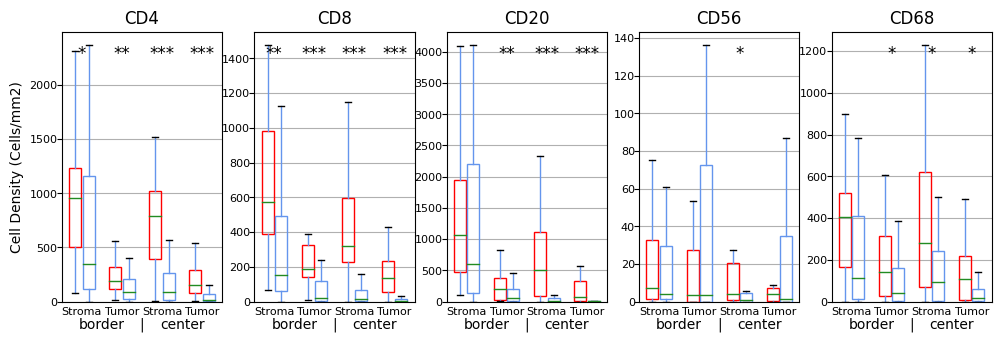

<Figure size 640x480 with 0 Axes>

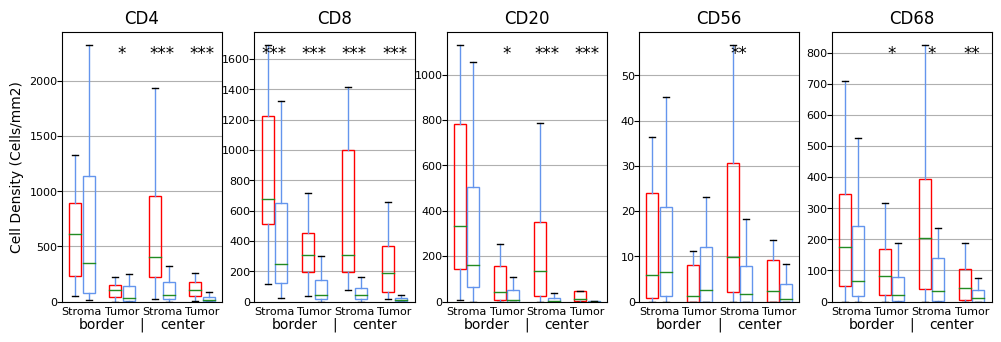

In [166]:
from scipy.stats import mannwhitneyu
import matplotlib.transforms


# Create offset transform by 5 points in x direction
dx = 4/72.; dy = 0/72. 
offset = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)

boxprops = dict(color='cornflowerblue')
whiskerprops = dict(color='cornflowerblue')
medianprops = dict(color='forestgreen')
flierprops = dict(markersize=5)

for i in ["auto-","inForm-"]:
    plt.figure()
    plt.tight_layout()
    # pd_all2 = pd.DataFrame(all_table, index = all_pts, columns = all_table_header2)
    fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(12, 3.5), sharey=False)
    for n_i, n in enumerate(["CD4", "CD8", "CD20", "CD56", "CD68"]):
        data_to_plot = []
        stats_to_plot = []
        for k in ["border-","center-"]:
            for l in ["Stroma","Tumor"]:
                data_to_plot.append(df_all2[df_all2['inflammation'] == 'infl'][df_all2['location'] == k[:-1]]['density of ' + n + ' in ' + l + ' found by ' + i[:-1] + ' analysis']/0.4999/0.4999)
                data_to_plot.append(df_all2[df_all2['inflammation'] == 'non-infl'][df_all2['location'] == k[:-1]]['density of ' + n + ' in ' + l + ' found by ' + i[:-1] + ' analysis']/0.4999/0.4999)
                _, p_value = mannwhitneyu(data_to_plot[-2],data_to_plot[-1],alternative='greater')
                n_stars = ''
                if p_value < 0.05:
                    if p_value <0.01:
                        if  p_value < 0.001:
                            n_stars = '***'
                        else:
                            n_stars = '**'
                    else:
                        n_stars = '*'
                stats_to_plot.append(n_stars)
                # print(i,k,l,n,p_value,n_stars,np.nanmean(data_to_plot[-2]),np.nanmean(data_to_plot[-1]))
        x_pos = [1,1.5,2.5,3,4,4.5,5.5,6]
        x_pos_stars = [1.25,2.75,4.25,5.75]

        b_plot = axs[n_i].boxplot(data_to_plot, positions=x_pos, patch_artist=True, widths=0.45,
                                  boxprops=boxprops,medianprops=medianprops,showfliers=False,whiskerprops=whiskerprops)
        
        # plt.setp(b_plot['boxes'], color='red')
        for n_p, patch in enumerate(b_plot['boxes']):
            if n_p%2 == 0:
                patch.set_color('red')
            patch.set_facecolor('none')
            
        for n_x in range(4):
            axs[n_i].text(x_pos_stars[n_x],axs[n_i].get_ylim()[1]*0.9,stats_to_plot[n_x], horizontalalignment='center',size=12)
        first_x_label = ['Stroma','Tumor','Stroma','Tumor']
        second_x_label = ['border','center']
        for n_x in range(4):
            axs[n_i].text(x_pos_stars[n_x],axs[n_i].get_ylim()[1]*-0.05,first_x_label[n_x], horizontalalignment='center',size=8)
        for n_x in range(2):
            axs[n_i].text((x_pos_stars[n_x*2]+x_pos_stars[n_x*2+1])/2,axs[n_i].get_ylim()[1]*-0.1,second_x_label[n_x], horizontalalignment='center')
        axs[n_i].text(3.5,axs[n_i].get_ylim()[1]*-0.1,'|', horizontalalignment='center')
        axs[n_i].set_title(n)
    fig = plt.gcf()
    fig.suptitle('')
    ax = fig.gca()
    # ax.set_ylim(0,1000)
    # print(pd_all2.loc[pd_all2['inflammation']=='infl',fig_title])
    # print(pd_all2.loc[pd_all2['inflammation']=='non-infl',fig_title])
    for ax in axs:
        ax.set_ylim((0,ax.get_ylim()[1]))
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_xticks([])
        ax.yaxis.grid(True)
        for label in ax.get_yticklabels():
            label.set_fontsize(8)
            label.set_transform(label.get_transform() + offset)
            # label.set_
            # label.set_rotation(30)
            # label.set_va('center')
            # label.set_ha('right')
        # ax.xaxis.grid(True)

    axs[0].set_ylabel('Cell Density (Cells/mm2)')

In [120]:
for i in data_to_plot[-2].to_numpy():
    print(i)

27.36094328287542
0.0
1.0861487017490372
0.0
5.402160648172842
36.41456436916509
0.0
159.29228196966804
0.0
13.605441632435308
3.7464984495198697
13.060223567017864
9.123649094691913
3.401360408108827
2.4409762928780996
1.5606241872499325
12.061967161528782
3.401360408108827
0.0
6.297064028274204
1.4405761728460915
0.49019605881568384
0.0
0.0
0.4351740522139234


In [ ]:
# df_cell_density_index = [i+j+k+l for i in ["auto-","inForm-"] for j in ["infl-","non-infl-"] for k in ["border-","center-"] for l in ["Stroma","Tumor"]]
# df_cell_density_keys = ["region1", "tissue", "CD8", "CD4", "CD20", "CD68", "CD56", "inflammation", "region2"]
# df_cell_densities = pd.DataFrame(index =df_cell_density_index, columns = df_cell_density_keys)
# for i in ["auto-","inForm-"]:
#     for j in ["infl-","non-infl-"]:
#         for k in ["border-","center-"]:
#             for l in ["Stroma","Tumor"]:
#                 m = i+j+k+l
#                 df_cell_densities.loc[m,"region2"] = k[:-1]
#                 if l == "Stroma":
#                     df_cell_densities.loc[m,"region1"] = k[:-1]
#                 df_cell_densities.loc[m,"tissue"] = l
#                 df_cell_densities.loc[m,"inflammation"] = j[:-1]
#                 for n in ["CD8", "CD4", "CD20", "CD68", "CD56"]:
#                     df_cell_densities.loc[m,n] = np.nanmean(df_all2[df_all2['inflammation'] == j[:-1]][df_all2['location'] == k[:-1]]['density of ' + n + ' in ' + l + ' found by ' + i[:-1] + ' analysis'])/0.4999/0.4999


p_values=pd.Series()
for n in ["CD8", "CD4", "CD20", "CD68", "CD56"]:
    for i in ["auto-","inForm-"]:
        for k in ["border-","center-"]:
            for l in ["Stroma","Tumor"]:
            # m = i+j+k+l
            # df_cell_densities.loc[m,"region2"] = k[:-1]
            # if l == "Stroma":
            #     df_cell_densities.loc[m,"region1"] = k[:-1]
            # df_cell_densities.loc[m,"tissue"] = l
            # df_cell_densities.loc[m,"inflammation"] = j[:-1]
                _, p_value = mannwhitneyu(df_all2[df_all2['inflammation'] == 'infl'][df_all2['location'] == k[:-1]]['density of ' + n + ' in ' + l + ' found by ' + i[:-1] + ' analysis'],
                                          df_all2[df_all2['inflammation'] == 'non-infl'][df_all2['location'] == k[:-1]]['density of ' + n + ' in ' + l + ' found by ' + i[:-1] + ' analysis'])
                n_stars = ''
                if p_value < 0.05:
                    if p_value <0.01:
                        if  p_value < 0.001:
                            n_stars = '***'
                        else:
                            n_stars = '**'
                    else:
                        n_stars = '*'
                p_values[i+k+l+'_'+n] = [p_value, n_stars]
                # df_cell_densities.loc[m,n] = np.nanmean(df_all2[df_all2['inflammation'] == j[:-1]][df_all2['location'] == k[:-1]]['density of ' + n + ' in ' + l + ' found by ' + i[:-1] + ' analysis'])/0.4999/0.4999


# df_cell_densities.to_excel(output_folder + 'cell_densities.xls')

define the plotting function

make the plots